
<h3><font color='black'>Data Mining Project  </font></h3>
Amnah Abdelrahman

#                          <center style='color:blue'><u> BoardGameGeek Reviews</u></center>  

### Table of Content: 
* [Introduction](#Introduction)
* [Data Description](#Data_Description)
* [Data Processing](#Data_Processing)
* [Data Exploration](#Data_Exploration)
* [Train Test Split](#train_test_split)

* [Text preprocessing](#Text_preprocessing)
    * [Count Vectorizer](#CountVectorizer) 
    * [TfidfVectorizer (Term Frequency times Inverse Document Frequency)](#TfidfVectorizer)
        
* [Model Selectoin](#Model_Selectoin)
    * [Linear and Logistic Regression](#Linear_and_Logistic_Regression)
    * [Linear Classifiers](#Linear_Classifiers)
    * [Support Vector Machine](#Support_Vector_Machine)
    * [Linear Support Vector Machine](#Linear_Support_Vector_Machine)
    * [Naive Bayes Classifier](#Naive_Bayes_Classifier)
    * [Decision Tree Classifier](#Decision_Tree_Classifier)
    * [Ensemble Model](#Ensemble_Model)
        * [Boosting Models](#Boosting_Models)
        * [Random Forest Classifier](#Random_Forest_Classifier) 
    * [Convolutional Neural Network (Futuer work)](#Convolutional_Neural_Network) 
        
* [hyperparameter Tuning ](#hyperparameter_Tuning)
     * [Grid Search Cross Validation](#GridSearchCV)
     * [Randomized Search Cross Validation](#RandomizedSearchCV)
        
* [Results](#Results)
* [Challenges](#Challenges)
* [References](#References)

<h1 id="Introduction" style='color:blue'>Introduction</h1>




The goal of this project is to predict the rating of a board-game given a review, using text analysis tools and machine learning methods. BoardGameGeek is the world's largest board game site. It provides huge data of all board-games with much information on each game like the game difficulty, the number of players, the time required for the game, the designer, and some recommendations. it is also giving the number of reviews, user comments, games ranking, and much more. 

The general sequence to build a prediction/classification model starts by understanding the problem and describing the dataset by using visualization tools as an example. Then, selects the features and prepares the dataset to fit the proposed predictive models. After that, it remains to apply the model evaluation and select the most promising model. Finally, optimizes and measure the final model performance, before presenting the last result. This is going to be our methodology in this project.

This work is mainly our work, we read many blogs and websites to understand and grasp the general way to solve the problem. In terms of contribution, we set various model parameters and trials during different stages in this work, and the credits and citations are given for the implementation we learned from others.

So let's start mining 



### Load Libraries
The first thing we need to do is loading the required libraries,

In [1]:
# basic libraries for dataframe, graphs 
import sys, sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# for model selection
from sklearn import linear_model
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import decomposition, ensemble
from sklearn import tree

# Model optimization 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import RandomizedSearchCV


# for data preparation and model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error 
from sklearn import linear_model, preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import model_selection, preprocessing, metrics
from sklearn.model_selection import cross_val_score , train_test_split


# Text analysis and transformation
import nltk
import string
from nltk.stem import PorterStemmer
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer


# ANN model 
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
#from keras.models import Sequential  low_memory=False

Using TensorFlow backend.



<a id = "Data_Description"></a>

<h1 id="Data_Description" style='color:blue'>Data Description</h1>



 The source of the data is Kaggle https://www.kaggle.com/jvanelteren/boardgamegeek-reviews#2019-05-02.csv.
 The data spread over 3 CSV files:
 
- <i>games_detailed_info.csv</i>  (with 56 columns and 17063) : 
This file has a many detials about all type of board games, exmaples: are  the game rank, number of plyers,    number of user rated, time requried for the game, desiner and some instructions.    
*** 
-  <i>bgg-13m-reviews.csv</i> (with 6 columns and 13170073):
provids the user names with there reviews and rating for each game.
*** 
- <i>2019-05-02.csv</i> (9 columns and 17065) : 
This file contain more precisis information for each game the game name ,year, rank and number of users rated. 



### Load Dataset

In [2]:
detailed_df = pd.read_csv('/Users/mamo/Downloads/games_detailed_info.csv',low_memory=False)  # for the interpretuer to deterimne datatype it take hight memorey
reviews_df = pd.read_csv('/Users/mamo/Downloads/bgg-13m-reviews.csv')
ranking_df = pd.read_csv('/Users/mamo/Downloads/2019-05-02.csv')

In [3]:
 detailed_df.head()

,Unnamed: 0,Abstract Game Rank,Accessory Rank,Amiga Rank,Arcade Rank,Atari ST Rank,Board Game Rank,Children's Game Rank,Commodore 64 Rank,Customizable Rank,...,suggested_language_dependence,suggested_num_players,suggested_playerage,thumbnail,trading,type,usersrated,wanting,wishing,yearpublished
0,0,NaN,NaN,NaN,NaN,NaN,327,NaN,NaN,NaN,...,"[OrderedDict([('@level', '36'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/g8LvJsd...,1685,boardgame,85332,453,4729,1995
1,1,NaN,NaN,NaN,NaN,NaN,151,NaN,NaN,NaN,...,"[OrderedDict([('@level', '1'), ('@value', 'No ...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/kqE4YJS...,1477,boardgame,85052,498,5403,2000
2,2,NaN,NaN,NaN,NaN,NaN,74,NaN,NaN,NaN,...,"[OrderedDict([('@level', '21'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/HEKrtpT...,1977,boardgame,83486,614,7655,2008
3,3,NaN,NaN,NaN,NaN,NaN,45,NaN,NaN,NaN,...,"[OrderedDict([('@level', '1'), ('@value', 'No ...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/Grz-qM9...,1162,boardgame,69132,1029,9464,2010
4,4,NaN,NaN,NaN,NaN,NaN,76,NaN,NaN,NaN,...,"[OrderedDict([('@level', '21'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/iPlTR5c...,1806,boardgame,68284,571,6703,2008


In [4]:
reviews_df.head()

,Unnamed: 0,user,rating,comment,ID,name
0,0,sidehacker,10.0,NaN,13,Catan
1,1,Varthlokkur,10.0,NaN,13,Catan
2,2,dougthonus,10.0,"Currently, this sits on my list as my favorite...",13,Catan
3,3,cypar7,10.0,"I know it says how many plays, but many, many ...",13,Catan
4,4,ssmooth,10.0,NaN,13,Catan


In [5]:
ranking_df.head()

,ID,Name,Year,Rank,Average,Bayes average,Users rated,URL,Thumbnail
0,174430,Gloomhaven,2017,1,8.90,8.611,24574,/boardgame/174430/gloomhaven,https://cf.geekdo-images.com/micro/img/8JYMPXd...
1,161936,Pandemic Legacy: Season 1,2015,2,8.64,8.489,30921,/boardgame/161936/pandemic-legacy-season-1,https://cf.geekdo-images.com/micro/img/KbAKyhb...
2,182028,Through the Ages: A New Story of Civilization,2015,3,8.53,8.258,15551,/boardgame/182028/through-ages-new-story-civil...,https://cf.geekdo-images.com/micro/img/APvZ_BY...
3,167791,Terraforming Mars,2016,4,8.40,8.242,38331,/boardgame/167791/terraforming-mars,https://cf.geekdo-images.com/micro/img/71v8jF5...
4,12333,Twilight Struggle,2005,5,8.33,8.175,34268,/boardgame/12333/twilight-struggle,https://cf.geekdo-images.com/micro/img/uStZr7_...


In [6]:
# check the size of each file 
print("detailed_df (rows ,columns )",detailed_df.shape)
print("ranking_df (rows ,columns )", ranking_df.shape)
print("reviews_df (rows ,columns )",reviews_df.shape)

detailed_df (rows ,columns ) (17063, 56)
ranking_df (rows ,columns ) (17065, 9)
reviews_df (rows ,columns ) (13170073, 6)


We can use the method  'info()' to have a gereral idea about the columns names, data type, and missing data in each column

In [7]:
# check the columns names, data type, and missing data
detailed_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17063 entries, 0 to 17062
Data columns (total 56 columns):
Unnamed: 0                       17063 non-null int64
Abstract Game Rank               953 non-null float64
Accessory Rank                   1 non-null float64
Amiga Rank                       1 non-null float64
Arcade Rank                      1 non-null float64
Atari ST Rank                    1 non-null float64
Board Game Rank                  17063 non-null object
Children's Game Rank             767 non-null float64
Commodore 64 Rank                1 non-null float64
Customizable Rank                280 non-null float64
Family Game Rank                 1806 non-null float64
Party Game Rank                  525 non-null float64
RPG Item Rank                    1 non-null float64
Strategy Game Rank               1900 non-null float64
Thematic Rank                    1037 non-null float64
Video Game Rank                  1 non-null float64
War Game Rank                    2921

In [8]:
ranking_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17065 entries, 0 to 17064
Data columns (total 9 columns):
ID               17065 non-null int64
Name             17065 non-null object
Year             17065 non-null int64
Rank             17065 non-null int64
Average          17065 non-null float64
Bayes average    17065 non-null float64
Users rated      17065 non-null int64
URL              17065 non-null object
Thumbnail        17020 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [9]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13170073 entries, 0 to 13170072
Data columns (total 6 columns):
Unnamed: 0    int64
user          object
rating        float64
comment       object
ID            int64
name          object
dtypes: float64(1), int64(2), object(3)
memory usage: 602.9+ MB



<a id = "Data_Processing"></a>

<h1 id="Data_Processing" style='color:blue'> Data Processing </h1>




Data cleaning and data processing are important steps for a good model, usually, these steps required much of time but it totally worth it at the end. 
In this section, we are going to drop all the missing columns and the missing reviews. Then we are going to merge all the data frames together to produce one data frame with all the required features.



In [10]:
# count the missing data
detailed_df.isnull().sum()
ranking_df.isnull().sum()
reviews_df.isnull().sum()

Unnamed: 0           0
user                66
rating               0
comment       10532317
ID                   0
name                 0
dtype: int64



In our way to prepare the dataset, we will remove all the unrelated features to the problem. In the game's details file, there are 25 columns are missing more than 80% of their values, so they will be removed, as well as the 'URL','Thumbnail' from the ranking file, and 'Unnamed: 0' form the review file. Finally, we will delete all the 10532317 missing comments rows. 



In [11]:
# Drop all the coulmns with missing values and the redundent/uneeded once for our classfiaction problem

detailed_df = detailed_df.drop(axis=1, index=None, columns=[
'Unnamed: 0',   'Abstract Game Rank','Accessory Rank', 'Amiga Rank','Arcade Rank', 'Atari ST Rank',                   
"Children's Game Rank", 'Commodore 64 Rank','Customizable Rank', 'Family Game Rank','Party Game Rank',                  
'RPG Item Rank', 'Strategy Game Rank', 'Thematic Rank', 'Video Game Rank',                  
'War Game Rank', 'alternate', 'boardgameartist', 'boardgamecategory', 'boardgamecompilation',             
'boardgamedesigner', 'boardgameexpansion',  'boardgamefamily',  'boardgameimplementation',          
'boardgameintegration', 'boardgamemechanic','boardgamepublisher', 'description','image',                               
'suggested_language_dependence', 'suggested_playerage', 'thumbnail','type' ])

ranking_df = ranking_df.drop(axis=1, index=None, columns=['URL','Thumbnail'])

reviews_df = reviews_df.drop(axis=1 ,columns=['Unnamed: 0']) 

reviews_df = reviews_df.dropna(axis=0 ,subset=['comment'])    # Drop all missing reviews 




The following step is an Inner join between the detailed_df & ranking_df data-farms, based on ID's, where both of them almost has the same numbers of rows. Using an inner join requires each row in the two joined data-frames to have the same number of rows, this could lead to loss of some rows, unlike the left join. Then the following step is a left join between the outcome of the inner join with the review data-frame where this last one has 13170073 instances. 




In [12]:
ranking_detailed_df = pd.merge(left=ranking_df, right=detailed_df, left_on='ID', right_on='id') # inner join

In [13]:
joint_df = pd.merge(left=reviews_df, right=ranking_detailed_df, how='left', left_on='ID', right_on='ID') # left join
joint_df.shape

(2637756, 34)

In [14]:
joint_df = joint_df.dropna(axis=0)



Now after we did some cleaning and merged the data-frames, we now have one data-frame, but still, there some work that needs to be done, making sure that we have only the useful data without redundant or missing values. 
So now we are going to dig a little bit deeper into the columns, understanding the correlation between them regards to the target vector which is the 'rating'.





The method 'corr()' is a statistical tool to calculate the correlation between the feature and the target. The correlation between the numerical features is a good way to reduce model complexity and avoid what's known as overfitting situation. The closer the value to one the strongest correlation, the closer to zero the weaker correlation.



In [15]:
# ths corolation of numeric values to the the target 'Rating' the main ranking
correlations = joint_df.corr()
correlations['rating'] 

rating           1.000000
ID               0.142289
Year             0.079402
Rank            -0.377836
Average          0.472208
Bayes average    0.391648
Users rated      0.168143
average          0.472183
averageweight    0.262816
bayesaverage     0.391592
id               0.142289
maxplayers      -0.033505
maxplaytime      0.025177
median                NaN
minage           0.154818
minplayers      -0.062163
minplaytime      0.012621
numcomments      0.162665
numweights       0.147719
owned            0.155470
playingtime      0.025177
stddev          -0.148269
trading          0.107020
usersrated       0.168679
wanting          0.297591
wishing          0.275067
yearpublished    0.043494
Name: rating, dtype: float64

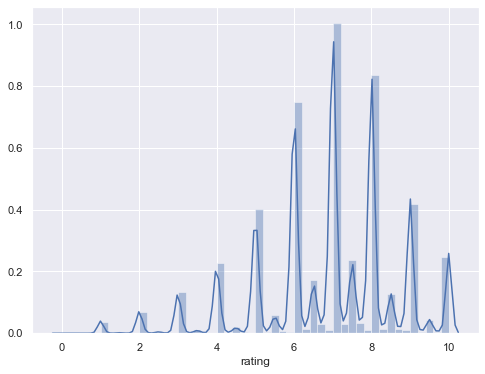

In [16]:
# plot # 'rating', 'Average','averageweight', 'Bayes average', 'stddev','numweights', 'Rank','Board Game Rank'
plt.figure(figsize=(8, 6))
sns.set(color_codes="True")
sns.distplot(joint_df["rating"])

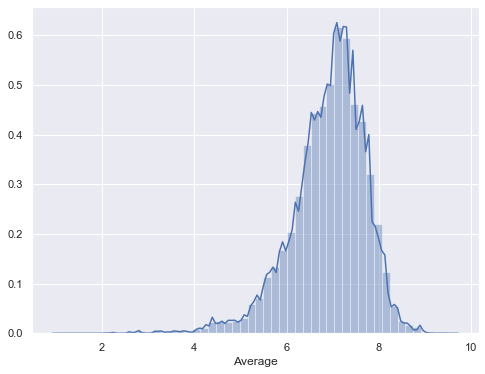

In [17]:
plt.figure(figsize=(8, 6))
sns.set(color_codes="True")
sns.distplot(joint_df["Average"])

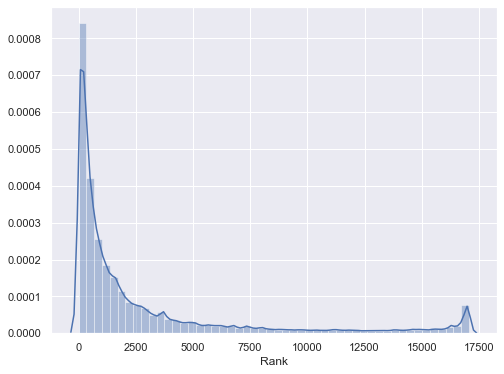

In [18]:
plt.figure(figsize=(8, 6))
sns.set(color_codes="True")
sns.distplot(joint_df["Rank"])

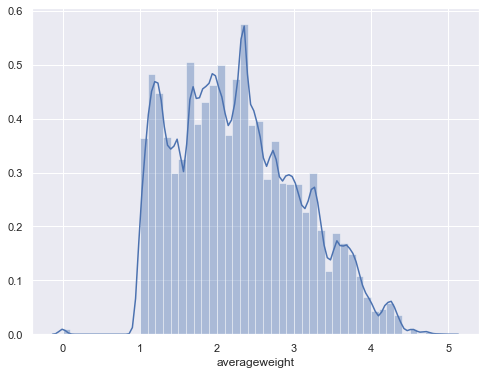

In [19]:
plt.figure(figsize=(8, 6))
sns.set(color_codes="True")
sns.distplot(joint_df["averageweight"])

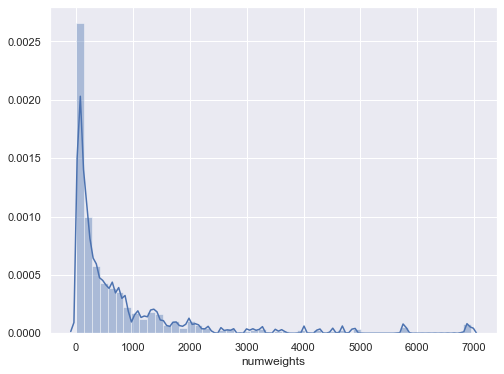

In [20]:
plt.figure(figsize=(8, 6))
sns.set(color_codes="True")
sns.distplot(joint_df["numweights"])

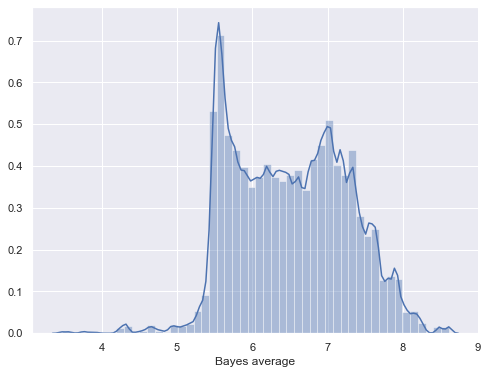

In [21]:
plt.figure(figsize=(8, 6))
sns.set(color_codes="True")
sns.distplot(joint_df["Bayes average"])

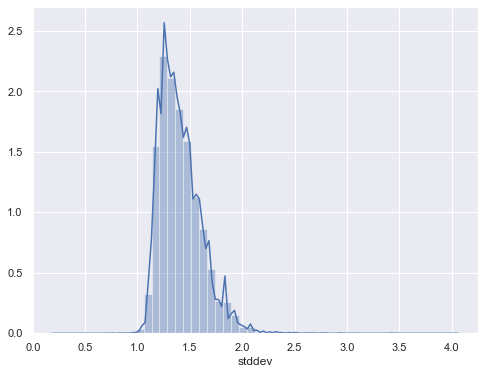

In [22]:
plt.figure(figsize=(8, 6))
sns.set(color_codes="True")
sns.distplot(joint_df["stddev"])



From the above, we can see that some features have a negative correlation with the target so we element them, as well as the very strong correlated once.  Rank, Average, Bayes average, ID, and stddev, all of them will be removed to reduce the model complexity. 
The above graphs give us more sight on these data, obviously Rating and Average have the same purpose, then the Bayes average and averge-weight are related to the game complexity. Finally Rank and num-weights are looks the same. All of these data can be ignored for our model.  A feature engineering we can do is to find the difference between the following:

                                        * playes_num = 'maxplayers'-'minplayers'
                                        * play_time = 'maxplaytime' - 'minplaytime'
                                        * set the max value of 'playingtime','play_time'

The last one is taking the maximum value between the newly play_time column we created and the existing playing-time column.



In [23]:
joint_df['playes_num'] = joint_df['maxplayers'] - joint_df['minplayers']
joint_df['play_time'] = joint_df['maxplaytime'] - joint_df['minplaytime']
joint_df['Time'] = joint_df[['playingtime','play_time']].max(axis=1)

#joint_df['Board Game Rank'] = joint_df['Board Game Rank'].apply(pd.to_numeric, errors='coerce')  # convert from object to numeric

We just want to order the features for a better visualisation. 

In [24]:

joint_reviews_renking_detailed = joint_df[['Name','Year','rating','numweights','usersrated',
                                           'numcomments','user','comment', 'wanting', 'wishing', 
                                           'trading', 'owned','Time','playes_num','minage']]
joint_reviews_renking_detailed.shape

(2637734, 15)

In [25]:
#for last time lets drop all the missing and dupliactes rows
joint_reviews_renking_detailed = joint_reviews_renking_detailed.dropna(axis=0)
joint_reviews_renking_detailed = joint_reviews_renking_detailed.drop_duplicates(subset=None, keep="first", inplace=False)
joint_reviews_renking_detailed.shape

(2637734, 15)


Free our memory from unused data-frames using del keyword, this will help to reduce the allocated memory and speed the computation time. 


In [26]:
del detailed_df
del reviews_df
del ranking_df
del ranking_detailed_df
del joint_df


<a id = "Data_Exploration"></a>

<h1 id="Data_Exploration" style='color:blue'>Data Exploration</h1>



Presently, let's focus narrowly on the data we end up with. Using a heatmap can present the correlation between all the numerical features. The extremely dark spots in the heat map indicate a significant correlation between the features. 


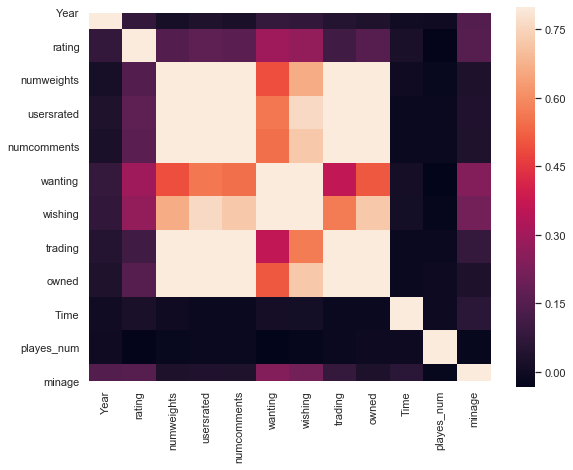

In [27]:
figure1 = joint_reviews_renking_detailed.corr()
fig =plt.figure (figsize=(9,7))
sns.heatmap(figure1, vmax= .8 ,square=True)
plt.show()

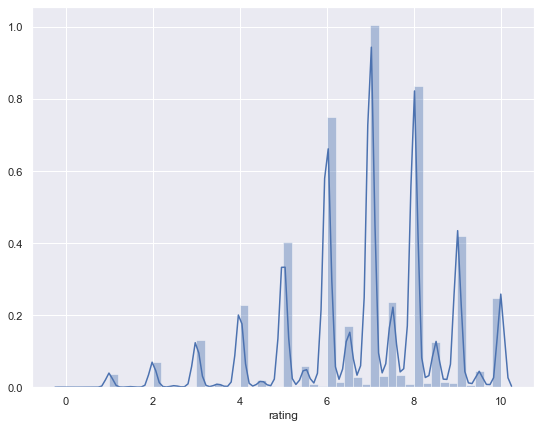

In [28]:
plt.figure(figsize=(9, 7))
sns.set(color_codes="True")
sns.distplot(joint_reviews_renking_detailed["rating"])

In [29]:
joint_reviews_renking_detailed.rating.describe()

count    2.637734e+06
mean     6.852076e+00
std      1.775763e+00
min      1.401300e-45
25%      6.000000e+00
50%      7.000000e+00
75%      8.000000e+00
max      1.000000e+01
Name: rating, dtype: float64



An important notice from the above graph is the rating is a continuous variable later will convert it to integer and treat the rates as classes. 

Moreover, most of the games are rated between 6 to 8 where rate 7 represents the peak. This means we may challenge a skewed data representation or an imbalanced class representation.

This challenge would affect the machine learning model, where the less rating representation might consider as an outlier. We will see later that some of the models can deal with this issue, and others are not. However, our main focus is the model accuracy, so we will ignore this problem for now.





Now let's group the data by the game name, user, and year. So we can have an idea of the number of games, the number of users who wrote comments.  The most rated game is Carcassonne. 



In [30]:
rate_group = joint_reviews_renking_detailed.groupby(['rating'])
name_group = joint_reviews_renking_detailed.groupby(['Name'])
year_group = joint_reviews_renking_detailed.groupby(['Year'])
user_group = joint_reviews_renking_detailed.groupby(['user'])

In [31]:
print(joint_reviews_renking_detailed['rating'].nunique())   
print(joint_reviews_renking_detailed['Name'].nunique()) 
print(joint_reviews_renking_detailed['Year'].nunique()) 
print(joint_reviews_renking_detailed['user'].nunique()) 

3408
16726
182
115239


In [32]:
print(joint_reviews_renking_detailed.rating.mode().value_counts())
print(joint_reviews_renking_detailed.Name.mode().value_counts())
print(joint_reviews_renking_detailed.Year.mode().value_counts())
print(joint_reviews_renking_detailed.user.mode().value_counts())

7.0    1
dtype: int64
Carcassonne    1
dtype: int64
2012.0    1
dtype: int64
Nap16    1
dtype: int64


Let's see the top 25 reviewed board games

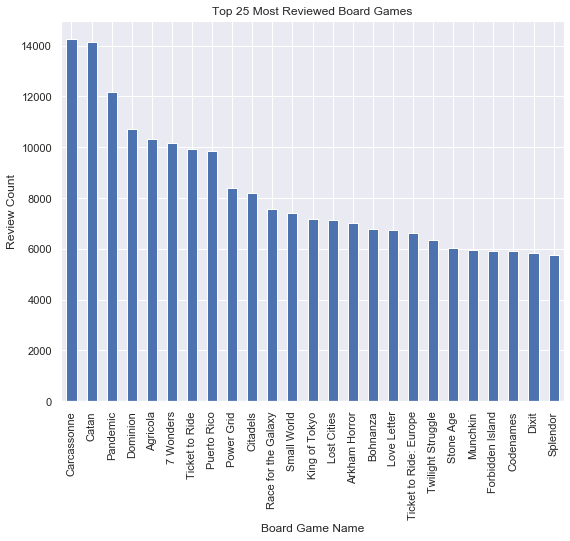

In [33]:
plt.figure(figsize=(9, 7))
joint_reviews_renking_detailed.loc[joint_reviews_renking_detailed['comment'].notna()]['Name'].value_counts()[:25].plot(kind='bar')
plt.xlabel('Board Game Name')
plt.ylabel('Review Count')
plt.title('Top 25 Most Reviewed Board Games')
plt.show()


<a id = "Text_preprocessing"></a>

<h1 id="Text_preprocessing" style='color:blue'>Text preprocessing</h1>




Instantly we are in our way to process the user reviews 'comment', dealing with a text is part of NLP Natural Language processing.

Natural language processing NLP concerned by the interactions between computers and human languages. Where texts are required to be transferred from raw text to flat features, so machine learning methods can process and analyze. There are different techniques and many recommendations when working with text, it typically depends on the objective. 

Remember our goal is predicting the rate based on a given review. Therefore, to begin with, we have to transfer the text to tokens (Means split the text into separate words.) , second, we can do text cleaning as follows:

* Remove the stop words(the highly frequent words like the, a, I, am, are, and so on) the reseason is the machine learning method will not learn significant information form these words, and doing so will appreciably reduce the computation time. 
* Remove the punctuations and all the tags, alter the text to lower case and so on 
* We can also drop all the words/vocabulary that appear rarely than five times in the whole reviews.
* We also can see the most frequent words and indicate our new features, this what know as a Bag-of-Words(BoW).
* An important point now the features will be in a shape of a matrix, this is mean that each word will represent a column and the value one will be assigned with corresponding to the review if the words are presents and zero otherwise, this is a basic technique to present the text as a feature and be able to train the model.

For all the above we perform the following three functions:

* tokenize_remove_punctuations(): to split the text into tokens (words), also lower them to avoid double counting, remove the stop_words=["all","in","the","is","and","it","we","to","an","of"], and count terms occurrence.
***
* sort_words_freq(): To sort the tokens based on their occurrence 
***
* delete_threshold() : to remove the least common words if the occurrence is less than 5 times 
***
* vector_matrix_review(): this function will give us the matrix representation of each token across the reviews, which we can use for the required machine learning method.




In [34]:
# load 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re 

stop_words = set(stopwords.words('english')) 
replace_signs = re.compile('[/(){}\[\]\|@,;]')    # Remove characteris from dict 
replace_digit = re.compile('[^0-9a-z #+_]')       # Remove digits from dict
words = set(nltk.corpus.words.words())


# credits goes to this blog 
# https://towardsdatascience.com/multi-class-text-classification-model-comparison-and-selection-5eb066197568

In [35]:
# Tokenize the text into tokens and count their frequencies
def tokenize_remove_punctuations(X):               
    wordfreq = {}
    for text in X:
        text = ' '.join(word for word in text.split() if word not in stop_words 
                                         if not word.isdigit() if len(word)>1 )   #if not word.isalpha())
        tokens = nltk.RegexpTokenizer(r"\w+").tokenize(text.lower())                                                 # len(word)>2   
        for token in tokens:                                    
            if token not in wordfreq.keys():
                wordfreq[token] = 1
            else:
                wordfreq[token] += 1
                
    return wordfreq 



# Sort words frequency in reverse order
def sort_words_freq(wordfreq):                        
    wordfreq_sorted = dict(sorted(wordfreq.items(), key=lambda x: x[1], reverse=True))
    return wordfreq_sorted
 
    
 # ignore rare words if the occurrence is less than five times (delete keys with value less than 5)   
def delete_threshold(wordfreq_sorted):              
    delete = []                                      
    for key, val in wordfreq_sorted.items(): 
        if val < 5 : 
            delete.append(key) 

    for i in delete: 
        del wordfreq_sorted[i] 
    return   wordfreq_sorted
    
    
#  BoW    
def vector_matrix_review(X):
    sentence_vectors = []
    for txt,i  in zip(X,y):   #txt,i in train_set.iterrows():
        sentence_tokens = nltk.RegexpTokenizer(r"\w+").tokenize(txt)
        sent_vec = []
        for token in wordfreq_sorted_X:   
            if token in sentence_tokens:
                sent_vec.append(1)
            else:
                sent_vec.append(0)
        sentence_vectors.append([sent_vec,i])
    return sentence_vectors    

In [36]:
x = tokenize_remove_punctuations(joint_reviews_renking_detailed['comment'])
x = sort_words_freq(x)
x = delete_threshold(x)



We can see we end up with 104873 words to use as features, These features are terms form the reviews.



In [37]:
len(x)

104873



Let's print the top 50 words in the dictionary,


In [38]:

top50 = {k: x[k] for k in list(x)[:50]}
print(top50)

{'game': 2579225, 'play': 755061, 'it': 685084, 'the': 618577, 'like': 530356, 'fun': 523627, 'one': 489238, 's': 480661, 'good': 401360, 'i': 398018, 'games': 386122, 'players': 365525, 'really': 360500, 'played': 355051, 'this': 338776, 'great': 331030, 'cards': 321630, 'player': 299628, 'much': 295691, 'time': 278989, 'get': 274947, 'well': 210733, 'rules': 209795, 'playing': 209517, 'card': 206935, 'would': 201089, 'little': 197993, 'first': 197060, 'plays': 192050, 'lot': 187849, 'better': 186553, 'there': 179096, 'theme': 178372, 'bit': 172875, 'still': 171240, 'interesting': 170497, 'nice': 166444, 'love': 164074, 'think': 163494, 'also': 160071, 'best': 147812, 'two': 144806, 'simple': 144798, 'm': 144094, 'make': 143748, 'many': 142388, 't': 141756, 'easy': 141405, 'even': 141282, 'dice': 138261}


Let's Generate a word cloud. Looks we need to stemm the words to thier roots, will this later in this notebook. 

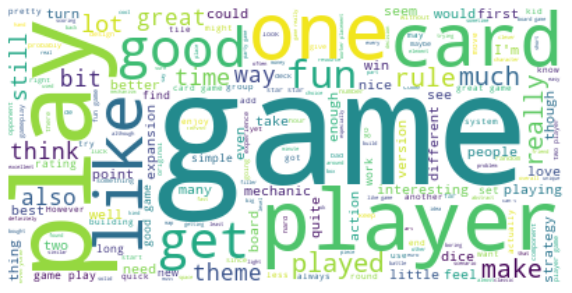

In [39]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(review for review in joint_reviews_renking_detailed['comment'].sample(10000))


# Generate a word cloud
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


<a id = "train_test_split"></a>

## Split out Training Set and Test Set 

Splitting the dataset into training and testing sets is one of the main steps for building a machine learning model. The training data with the labels will use to train the model. Then the test data without the labels will be used to predict and so we can evaluate the model accuracy and identify how the model will generalize on unseen data. These steps also will assist us to check if the model is overfitting. 

Overfitting (model with high variance) means that the model is unable to generalize well for new samples (unseen data). This situation happens will the model has a high variance and it trained very well on the training set but it would perform poorly on the test set (the unseen data).

Mathematically, it means the testing error is much higher than the training error. On the contrary, an underfitting (model with high bias) problem means that the model does not fit the new data well. This can be due to the low variance in the training set. 

Next we defined the input variable X (reviews) and the output variable y (Rating).

In [40]:
X = joint_reviews_renking_detailed['comment'].sample(frac = 0.10) # this is less than 10% of the dataset 
y = joint_reviews_renking_detailed['rating'].astype(int).sample(frac = 0.10) # convert all float to a intger for classification 



Train_test_split is a sklearn method to split the dataset into training and testing sets, there are diverse ways to split the amount of data between both. Usually, it is not a good practice to use all the data for training purpose; we have to hide some data to be able to evaluate the model generalization. We can try a different value for example 70 training/30 testing or 80 training/20 testing and that will actually help to measure how the model behaves regards to data size. But generally more data means better performance. 

For this project, the amount of data is about 2637734 reviews x 104873 features. We might conduct a portion of the number of reviews, operate the model, and evaluate. In addition for more simplification we would take a sample from the dataset to train the model, and evalute the perfomavce of the baseline model based on different size of the data.


In [41]:
# split dataset to train, test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)


In [42]:
#encoder = preprocessing.LabelEncoder()
#y_train = encoder.fit_transform(y_train)
#y_test = encoder.fit_transform(y_test)


<a id = "CountVectorizer"></a>

# CountVectorizer

Part of what we did on section [Text preprocessing](#Text_preprocessing)<a id = "Text_preprocessing"></a> simply can be done using built in SKlearn methods two of theme are: CountVectorizer and TfidfVectorizer. 




CountVectorizer convert our text documents to a matrix of token counts, every column represent a term, every row obtain a review and the cell is the term frequency count. As a parameter for this function, we sat the minimum occurrence of words to five and convert all terms to lowercase before tokenizing so for example 'TEXT' and 'text' counts as the same.
Add more the parameter ngram_range=(1, 2) , this is means consider both unigrams and bigrams, count the occurrences of a single term as a minimum and count the maximum occurrences of two pairs of consecutive words for example 'good game', removed the stop words and punctuation. Finally, fitting the text will build a dictionary of features and then transforms review to feature vectors. One last thing we can add is Lemmatize the words to their root to get out of the redundancy.  [https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html]




In [43]:


# Deduct inflected words to their word root,
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer:
    def __init__(self):
         self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
         return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

# credits to [https://scikit-learn.org/stable/modules/feature_extraction.html] 
# CountVectorizer(tokenizer=LemmaTokenizer(),


In [44]:


# convert our text documents to a matrix of token counts
vect = CountVectorizer(min_df=5,lowercase=True,ngram_range=(1, 2),
                       stop_words=stopwords.words('english') + list(string.punctuation))                     
X_train_0 = vect.fit_transform(X_train)   # fit and transfom train data
X_test_0 = vect.transform(X_test)         # transfrom test data




<a id = "TfidfVectorizer"></a>

# TfidfVectorizer (Term Frequency times Inverse Document Frequency)



Tfidf is able to overcome the problem of balancing between the short and the lengthy reviews in terms of the average count values, where they may have the same opinion but different average. Tfidf is a two-part function, Tf (Term frequency) is the normalization of the occurrence of each word in all reviews by the number of total words. Then idf (Inverse Document Frequency) means downscale the weights of such common words in the reviews, the reductoin will reflect the importance of the less common words across all the reviews as well. 

    TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)
    
    IDF(t) = log_e(Total number of documents / Number of documents with term t in it) [1](#1)


The same parameter were passed in CountVectorizer is passed in the TfidfVectorizer, except for the max_df which means ignore terms that appear in more than 75% of the documents. These cut will also help us to speed the compuation time.[https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html]



In [45]:


# transform a count matrix to a normalized tf-idf representation (tf-idf transformer)

tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=5, max_df=0.75,
                        smooth_idf=True, stop_words=stopwords.words('english') + list(string.punctuation))    
             # smoothing by adding 1 (Laplac) min_df occure less than 5 , max_df=0.5 occure more than half 

X_train_1 = tfidf.fit_transform(X_train)

X_test_1 = tfidf.transform(X_test)      



In [46]:
X_train_1.shape[0]  # Number of featuers to train with

42000


<a id = "Model_Selectoin"></a>

<h1 id="Model_Selectoin" style='color:blue'>Model Selectoin</h1>



To Begin with, we are consider this problem as a multinomial classification problem. Machine learning methods can divide as supervised, unsupervised, and reinforcement learning. The models we are implementing are supervised machine learning. Supervised machine learning can work for classification or regression problems. Classification is when the output is a categorical variable, regression for continuous output. 

In this section, we will try using different methods to be able to select which machine learning method is more promising for our problem. The selection is based on model accuracy.

There are many machine learning methods some of them are recommendable for text classification applications so we have a variety of choices we will introduce and apply some of them in our approach to find the most promising model based on the model accuracy.

After we processed the reviews (features vector) our data are ready to be fitted in the Machine learning algorithms to predict the rating. 


First of all, we started by building a classifiers/Regressor for:
* [Logistic Regression](#Linear_and_Logistic_Regression) 
* [Support Vector Machine (LinearSVC)](#Support_Vector_Machine) 
* [Linear Support Vector Machine (SGDClassifier)](#Linear_Support_Vector_Machine)
* [Naive Bayes Classifier (MultinomialNB)](#Naive_Bayes_Classifier)
* [Decision Tree Classifier](#Decision_Tree_Classifier)
* [Ensemble Model](#Ensemble_Model)
    * [Bagging Models](#Bagging_Models)
    * [Random Forest Classifier](#Random_Forest_Classifier) 
* [Convolutional Neural Network (CNN) (Futuer Work)](#Convolutional_Neural_Network)  



The main terms here are: 
* Training: fit the model
* Evaluation: calculat the model accuracy on the training dataset
* Prediction: predict the outpu and evaluate the model on the testset

The steps for this section is: fit the model, calculat the accuracy of the model on the train dataset, then evaluate the model on the testset. 



<a id ="Linear_and_Logistic_Regression"></a>

## Linear and Logistic Regression:



Logistic regression is a simple and powerful method for modelling and estimating the relationship between the input (independent) variable X (the predictor) and an output (dependent) variable Y (target/lable). It is commnly used as baseline model for any binary/multinomial/ordinal classification  problem. Linear regression output is continuous, while logistic regression output is discrete.

The value of the paramters are defult , ‘lbfgs’ solvers support only L2 regularization and it is the defult kernel for the new version 0.22.[https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html] 




<a id ="Linear_Classifiers"></a>

## Linear Classifiers



Linear classifiers (SVM, logistic regression, a.o.) with SGD training.

This method combines the regularized linear models with stochastic gradient descent (SGD) learning. This method usually works well with the sparse array. The sparse array is when the vector has many zeros where this case is shown in the bag of words model. This estimator fits a linear support vector machine (SVM).
To understand what is regularized model we need to understand what is regularizer. "Regularizer is a penalty added to the loss function that shrinks model parameters towards the zero vector using either the squared euclidean norm L2 or the absolute norm L1 or a combination of both (Elastic Net)" [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier].



<a id = "Support_Vector_Machine"></a>

## Support Vector Machine



Support Vector Machine is considered as a simple and powerful algorithm. It produces significant accuracy with less computation power. It can be used for regression and classification problems. The algorithm defines a hyperplane in an N-dimensional space between the support vectors data point to classify the data point. The objective is to find a hyperplane that maximizes the margin between the data points from each class. 

It might not perform well for text classification because it is unable to handle missing data, where we are going to implement this method LinearSVC() it can handle sparse and multiclass data point by train each class against the rest. 

Regularization parameter. C=1.0 [https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html]

<a id = "Naive_Bayes_Classifier"></a>

## Naive Bayes Classifier

Naive Bayes classifier is commonly used for the analysis of categorical data, specifically text data.
Worked based on the Bayes' theorem probability for each class, it assumes the conditional independence between features. It calculates the conditional probability for each class to be able to predict. An example of the computation look is the following. 
P(y |x1,x2,...,xn) = P (x1|y) * P(x2|y) * ... * P(xn|y) * P(y) 

We are using MultinomialNB(), this method from SKlearn for multiclass. [https://scikit-learn.org/stable/modules/naive_bayes.html]


<a id ="Decision_Tree_Classifier"></a>

## Decision Tree Classifier 


The decision tree is one of the basic knowledge representations used in different machine learning applications. It is a divide-and-conquer algorithm that maps the input features of an item to predict the item’s target value. The tree can grow deeply to learn highly irregular patterns[https://www-users.cs.umn.edu/~kumar001/dmbook/ch4.pdf].
Generally, there are three types of nodes for the whole tree: root node, inner root node and leaf node. The root node and inner node are both called decision nodes. They test selected samples (pairs of features and values) to split the tree. However, only the samples with a lower error are selected for the testing process and belong to the decision nodes. The leaf nodes contain an averaged numeric value or class as the final decision. This method stops when the tree reaches the maximum depth forced by the user. The disadvantage of this method are: its high variance may lead to an overfitting when applied to a full data set, also it does not perform will the missing data.




<a id ="Ensemble_Model"></a>

## Ensemble Learning 



The ensemble learning principle combines the strengths of several learning models such as a decision tree, support vector machine, polynomial regression and so on. The goal is to improve the prediction accuracy and overcome the problem of overfitting.
The combination of different types of base models have two approaches. The combination can be based on heterogeneous models with different algorithms or homogeneous models with the same algorithm. At the end, the ensemble produces an averaging result from all trained base models. This method is powerful for a scenario when we do not know the suitable learning method to use[https://scikit-learn.org/stable/modules/ensemble.html].

There are many ensemble methods, some the most common are the Bagging trees, the Boosting trees and random forest approaches. 




<a id ="Boosting_Models"></a>

### Boosting Trees




Boosting Trees.
The boosting tree is a meta-estimator that combines all the prediction models to produce a strong predictor. It was originally designed for classification problems, but it can be extended to regression problems. It works by first creating weak learners. All successive learners are weighted according to their success and the outputs are aggregated by average (for regression) and vote (for classification) the final prediction.
Two of popular boosting methods are the AdaBoost algorithm, introduced in 1995 by Freund and Schapire and Gradient Boosted Regression Trees (GBRT)[https://scikit-learn.org/stable/modules/ensemble.html].




<a id ="Random_Forest_Classifier"></a>

### Random Forest Classifier



Is an ensemble of decision trees with controlled variables for better prediction. It is a combination of bagging and a random selection of features. The random subspace method creates a random subset of the feature space to train the algorithm and then combine the outputs for the final result. 
The random forest uses multiple random trees for the given set of inputs then averages the prediction result of all these trees to provide a good estimation. It gives an algorithm the ability to train each tree using a selected subset from the training data called in-bag-samples. The remaining training data set (out-of-bag) is used to estimate error and variable importance for an individual’s tree, as well as for the whole forest. This is known as the validation process. The two key parameters that control the forest are the number of trees or estimators and the depth of each tree. Random forest did not suffer from the overfitting problem. 




LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
training Score =  0.7867142857142857
Train Mean Squer Error =   1.2101904761904763
test Score =  0.20577777777777778
Test Mean Squer Error =   4.500333333333334 



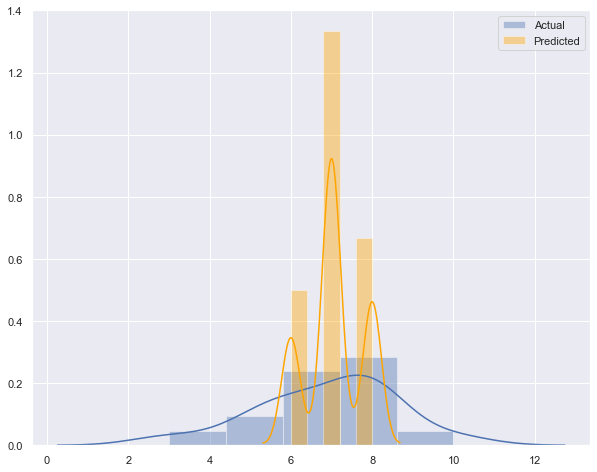


---------------------------------------------------------------------------------


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


/Users/mamo/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


training Score =  0.8848809523809524
Train Mean Squer Error =   0.5628809523809524
test Score =  0.18316666666666667
Test Mean Squer Error =   5.497111111111111 



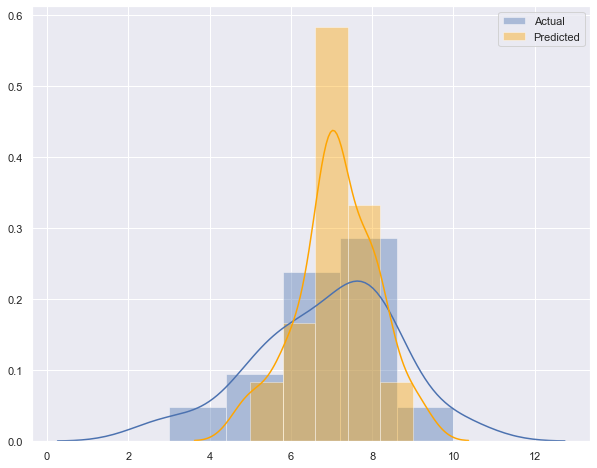


---------------------------------------------------------------------------------


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
training Score =  0.7248333333333333
Train Mean Squer Error =   1.5698333333333334
test Score =  0.19088888888888889
Test Mean Squer Error =   5.159888888888889 



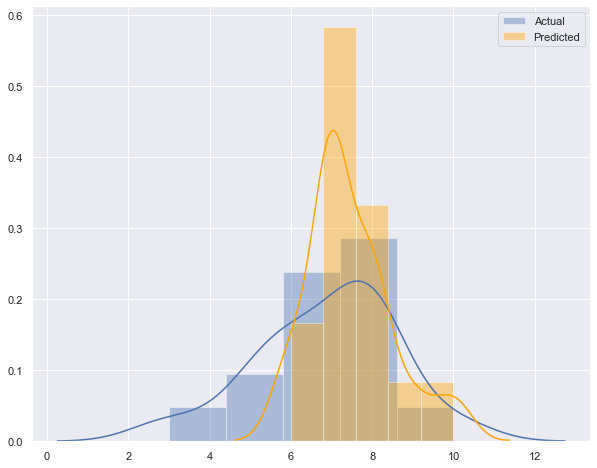


---------------------------------------------------------------------------------


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
training Score =  0.5479285714285714
Train Mean Squer Error =   2.855142857142857
test Score =  0.22027777777777777
Test Mean Squer Error =   3.9876666666666667 



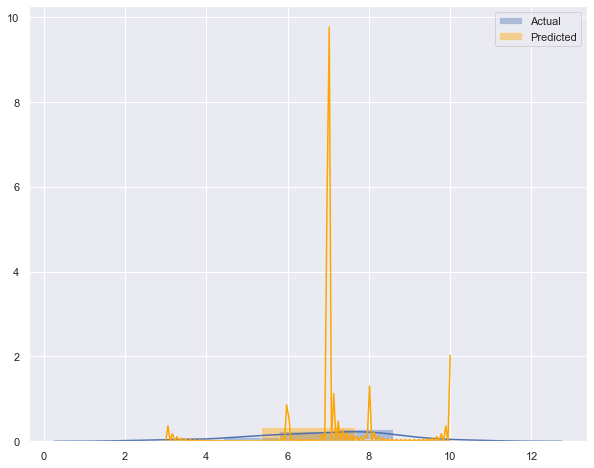


---------------------------------------------------------------------------------


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
training Score =  0.9489047619047619
Train Mean Squer Error =   0.3119047619047619
test Score =  0.18666666666666668
Test Mean Squer Error =   5.417111111111111 



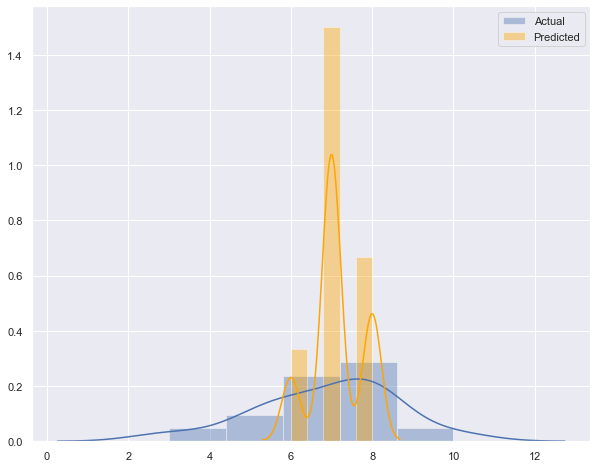


---------------------------------------------------------------------------------


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
training Score =  0.2652380952380952
Train Mean Squer Error =   3.2396666666666665
test Score =  0.26744444444444443
Test Mean Squer Error =   3.214 



/Users/mamo/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/mamo/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


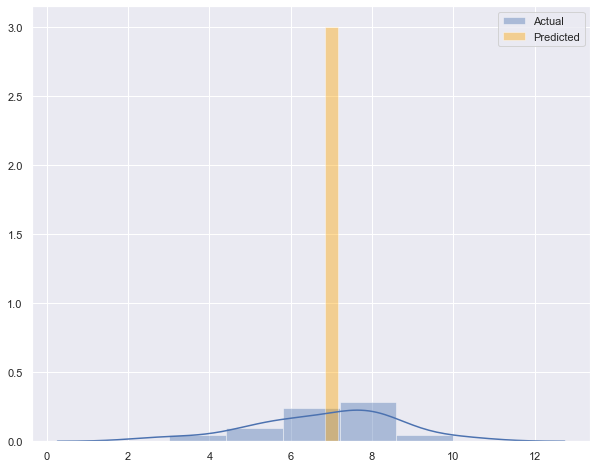


---------------------------------------------------------------------------------


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
training Score =  0.9489047619047619
Train Mean Squer Error =   0.2905238095238095
test Score =  0.23022222222222222
Test Mean Squer Error =   3.8315 



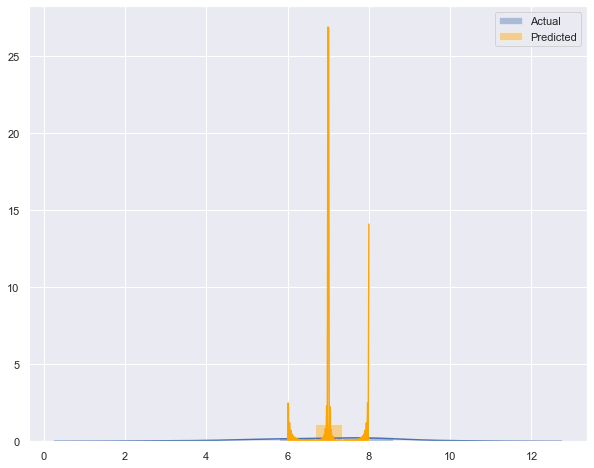


---------------------------------------------------------------------------------




In [47]:
# X_train_0 apply CountVectorizer

classifiers = [
    linear_model.LogisticRegression(solver='lbfgs',multi_class='auto',max_iter=1000), # to handle the FutureWarning
    svm.LinearSVC(),   
    SGDClassifier(), #(loss='hinge', penalty='l2',alpha=1e-3, random_state=42,max_iter=1000, tol=None),
    MultinomialNB(),
    DecisionTreeClassifier(),
    ensemble.AdaBoostClassifier(),
    ensemble.RandomForestClassifier(n_estimators = 100)
]



for item in classifiers:
    print(item)
    model = item
    model.fit(X_train_0, y_train)
    
    y_train_pred = model.predict(X_train_0)
    print("training Score = ",model.score(X_train_0,y_train))   #training score
    print("Train Mean Squer Error =  ", mean_squared_error(y_train_pred.astype(int), y_train))
    
    y_pred = model.predict(X_test_0)
    print("test Score = ", accuracy_score(y_pred.astype(int), y_test))    #test score
    print("Test Mean Squer Error =  ", mean_squared_error(y_pred.astype(int), y_test),"\n")
    
    
    
    plt.figure(figsize=(10, 8))
    sns.set(color_codes="True")
    sns.distplot(y_test.values[:15], color='b', label= 'Actual')   # its shows only the first 15 data point
    sns.distplot(y_pred[:15], color='orange', label='Predicted')
    plt.legend()
    plt.show() 
    
    
    
    
    print("\n---------------------------------------------------------------------------------\n\n")
    


For the above methods during out trail we used different amount od data between way less than 10% to 25%. The compuation takes a very long time by incerasing the size of the data set. But what we examind that the perfomance is getting slightly better for some methods I mean by that: 
(superizly the  LogisticRegression, and Linear support vector classifier, DecisionTreeClassifier and finally RandomForestClassifier)

|    | Logistic Regression | Linear support vector classifier | Decision Tree Classifier | RandomForestClassifier |
|:--:|:---------------------:|:---------------------:       |:---------------------:   |:---------------------: |
| Training Score |   0.735   |         0.832                |        0.86              |        0.91            | 
| Test Score     |   0.212   |         0.190                |        0.29              |        0.33            | 


On the other hand, Multinomial Niave Bayes and AdaBoostClassifier had a very poor perfomamce for the traning set,
but slightly better than others in the test set. 

|    | Multinomial Niave Bayes |  Stochastic Gradient Descent | AdaBoostClassifier       | 
|:--:|:---------------------:  |:---------------------:       |:---------------------:   |
| Training Score |   0.509     |         0.547                |        0.264             | 
| Test Score     |   0.228     |         0.199                |        0.264             | 



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
training Score =  0.4919047619047619
Train Mean Squer Error =   3.127404761904762
test Score =  0.23122222222222222
Test Mean Squer Error =   3.6239444444444446 



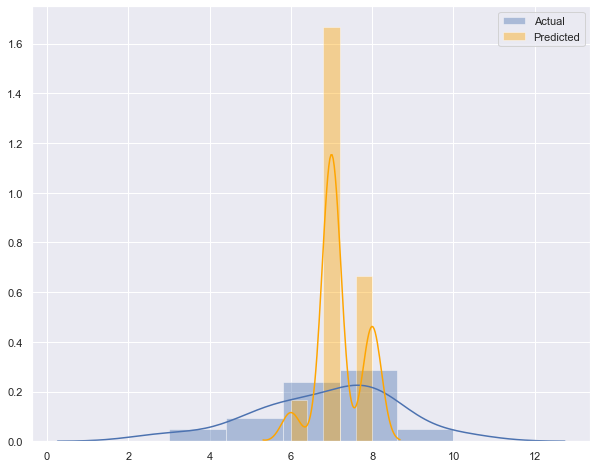


---------------------------------------------------------------------------------


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
training Score =  0.8077380952380953
Train Mean Squer Error =   1.0051666666666668
test Score =  0.2
Test Mean Squer Error =   4.617666666666667 



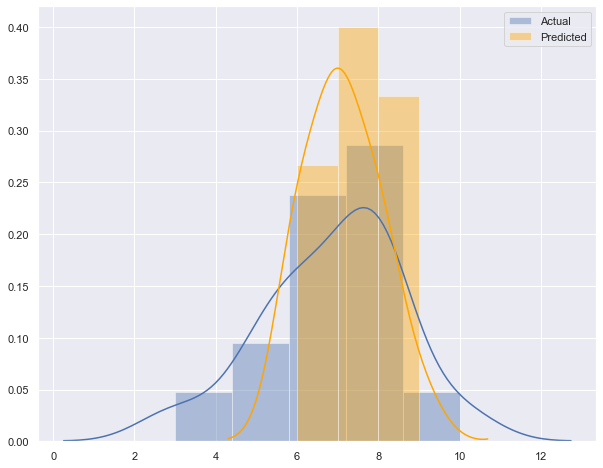


---------------------------------------------------------------------------------


SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)
training Score =  0.793404761904762
Train Mean Squer Error =   1.1492380952380952
test Score =  0.186
Test Mean Squer Error =   5.5615 



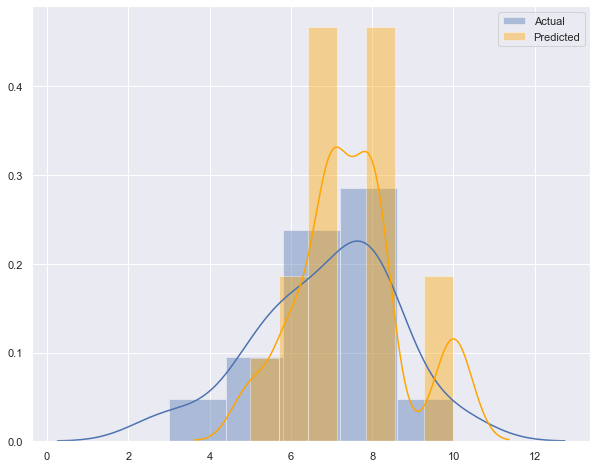


---------------------------------------------------------------------------------


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
training Score =  0.38283333333333336
Train Mean Squer Error =   3.153857142857143
test Score =  0.2576111111111111
Test Mean Squer Error =   3.282611111111111 



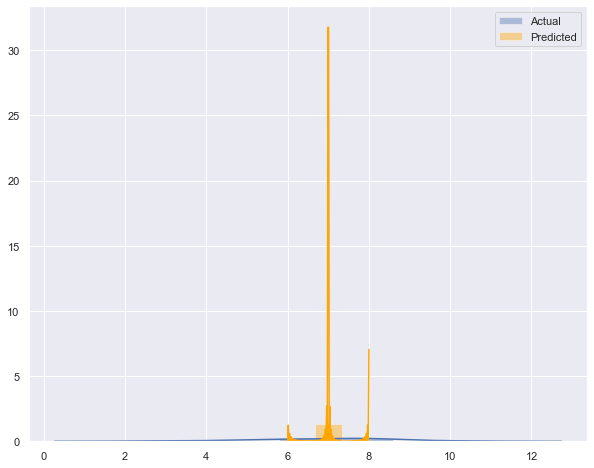


---------------------------------------------------------------------------------


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
training Score =  0.9486904761904762
Train Mean Squer Error =   0.31385714285714283
test Score =  0.1922222222222222
Test Mean Squer Error =   5.4245 



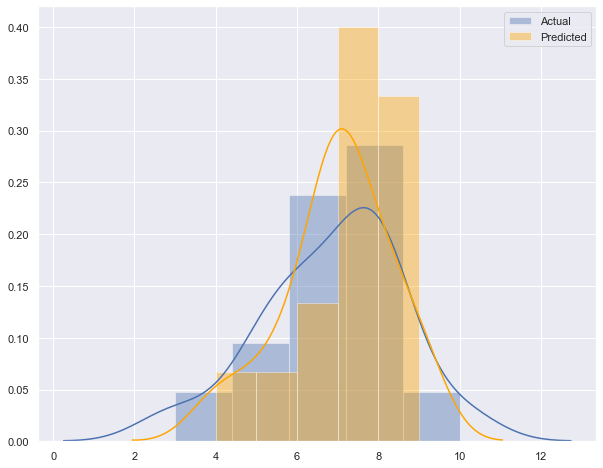


---------------------------------------------------------------------------------


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
training Score =  0.2658333333333333
Train Mean Squer Error =   3.1917857142857144
test Score =  0.26844444444444443
Test Mean Squer Error =   3.2 



/Users/mamo/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/mamo/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


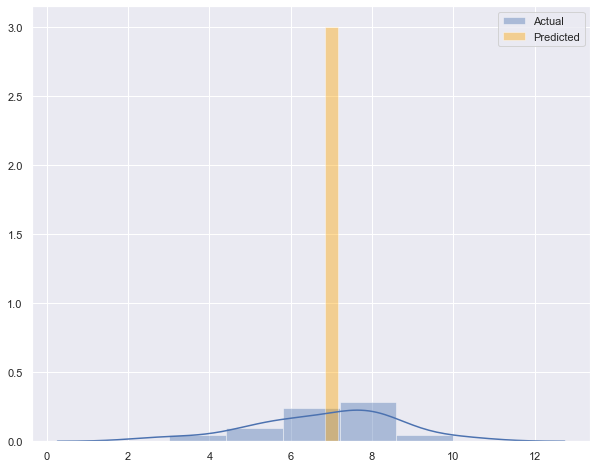


---------------------------------------------------------------------------------


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
training Score =  0.9486904761904762
Train Mean Squer Error =   0.29792857142857143
test Score =  0.23822222222222222
Test Mean Squer Error =   3.668888888888889 



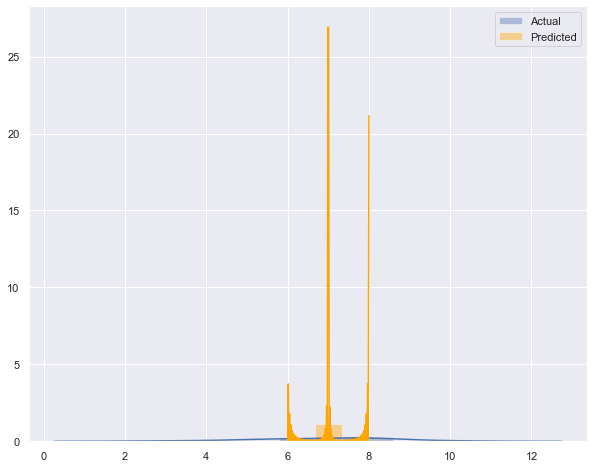


---------------------------------------------------------------------------------




In [48]:
# X_train_1  apply TfidfVectorizer

classifiers = [
    linear_model.LogisticRegression(solver='lbfgs',multi_class='auto',max_iter=1000), # to handle the FutureWarning
    svm.LinearSVC(),   
    SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42,max_iter=1000, tol=None),
    MultinomialNB(),
    DecisionTreeClassifier(),
    ensemble.AdaBoostClassifier(),
    ensemble.RandomForestClassifier(n_estimators = 100)
]



for item in classifiers:
    print(item)
    model = item
    model.fit(X_train_1, y_train)
    
    y_train_pred = model.predict(X_train_1)
    print("training Score = ",model.score(X_train_1,y_train))   #training score
    print("Train Mean Squer Error =  ", mean_squared_error(y_train_pred.astype(int), y_train))
    
    y_pred = model.predict(X_test_1)
    print("test Score = ", accuracy_score(y_pred.astype(int), y_test))    #test score
    print("Test Mean Squer Error =  ", mean_squared_error(y_pred.astype(int), y_test), "\n")
    
    
    plt.figure(figsize=(10, 8))
    sns.set(color_codes="True")
    sns.distplot(y_test.values[:15], color='b', label= 'Actual')
    sns.distplot(y_pred[:15], color='orange', label='Predicted')
    plt.legend()
    plt.show() 
    
    
    
    print("\n---------------------------------------------------------------------------------\n\n")


|    | Logistic Regression | Linear support vector classifier | Decision Tree Classifier | RandomForestClassifier |
|:--:|:---------------------:|:---------------------:       |:---------------------:   |:---------------------: |
| Training Score |   0.735   |         0.832                |        0.86              |        0.91            | 
| Test Score     |   0.212   |         0.190                |        0.29              |        0.33            | 

***

|    | Multinomial Niave Bayes |  Stochastic Gradient Descent | AdaBoostClassifier       | 
|:--:|:---------------------:  |:---------------------:       |:---------------------:   |
| Training Score |   0.509     |         0.547                |        0.264             | 
| Test Score     |   0.228     |         0.199                |        0.264             | 




Let's Have a closer look to the numbers

In [49]:
print("y_test=" ,y_test.values[:15] ,"y_pred=", y_pred[:15])

y_test= [ 8  8 10  8  7  8  6  8  7  6  8  3  6  5  5] y_pred= [7 7 8 7 8 7 8 7 7 7 6 7 7 7 7]


Predict the first review as an example 

In [50]:
print(joint_reviews_renking_detailed['comment'][0],"Actual rating is", joint_reviews_renking_detailed['rating'][0])

Currently, this sits on my list as my favorite game. Actual rating is 10.0


In [51]:

# you can try diffrent text to perdict 

model = ensemble.RandomForestClassifier(n_estimators = 100)
model.fit(X_train_1, y_train)
y_pred = model.predict(X_test_1)    
    
y_pred1 = model.predict(tfidf.transform(["Currently, this sits on my list as my favorite game"]))
print("test Score = ",y_pred1.astype(int))


test Score =  [8]



SGDClassifier, DecisionTreeClassifier and RandomForestClassifier are the methods had a good training score but a very poor test score. Therefore, we realize that our models is suffering from overfitting problem. 

To overcome the overfitting problem there are techniques we can try:
* Cross-validation
* Train model with more data
* Remove features to reduce model complexity
* Regularization, minimzes this loss function to balance between the error and model complexity.
* Ensembles are machine learning methods for combining predictions from multiple separate models, this one we already included in our classifiers set.



<a id = "hyperparameter_Tuning"></a>

<h1 id="hyperparameter_Tuning" style='color:blue'>hyperparameter Tuning and Model Optimization</h1>



Since <i>Random Forest Classifier</i> was the best model performance in approach 1 with the training score equals to 90% and test score 36%; which is not good engouh, we will try to improve the model accuracy. In the following, we will introduce model evaluation measurements.


Hyperparameter tuning is a model optimization technique that aims at setting the hyperparameter values for a learning method for the best performance. Examples of hyperparameters are the number of iterations or the number of decision trees or forest, as well as, the tree depth. One hyperparameter can on top of that be the learning rate which determines the contribution of each tree to a prediction.
The process of finding the best value is called search space. Basically, this is a method to test all possible values and parameter combinations to set the best parameter values. The latter parameters are evaluated using the validation set after the model has been trained and tested. A <i>grid search</i> is example of this technique. Furthermore, it can work with the <i>K-fold cross validation</i>.
Usually, when the model accuracy is too close to be random, it means something went wrong like the presence of useless features or of a hyperparameter that is not correctly tuned.

More iomprantalty, the best hyperparameters are usually impossible to determine with one trial, at this stage the work turn to be human role.[https://www.kaggle.com/emanueleamcappella/random-forest-hyperparameters-tuning]   



### Cross Validation 

Model validation procedure is to select from the candidate models based on their scores values. To chose the most successful model for further enhancement. On of the validation method is shuffle split cross validation, where it gave us a better score than the 10-fold. We set three as a number of the iteration to split and train the model. In addition, we used shuffle split cross validation with a search grid to tune the hyperprameter parameters. Within that we present the model feature importance. Finally, we plot the learning curve to check the model generalization.
Next section we will disccuse the Parameter Tuning and  the Model accracy.

### Training Visualizations and Model Evaluation


Continue with our best model <i>RandomForestClassifier</i>, we are going to look at the confusion matrix, and show the discrepancies between predicted and actual labels. The confusion matrix is a great way to see which categories model is mixing.


In [52]:

print(metrics.classification_report(y_test, y_pred))
print("Confusion matrix \n", confusion_matrix( y_test, np.array(y_pred))) 


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       159
           2       0.00      0.00      0.00       239
           3       0.05      0.00      0.01       512
           4       0.01      0.00      0.00       874
           5       0.09      0.01      0.02      1730
           6       0.19      0.15      0.17      3431
           7       0.27      0.68      0.38      4826
           8       0.20      0.14      0.16      3611
           9       0.07      0.01      0.01      1697
          10       0.03      0.00      0.00       921

    accuracy                           0.24     18000
   macro avg       0.09      0.10      0.08     18000
weighted avg       0.17      0.24      0.17     18000

Confusion matrix 
 [[   0    0    1    1    3   20  109   21    4    0]
 [   0    0    1    1    3   25  169   37    2    1]
 [   0    0    2    2    8   80  348   65    5    2]
 [   1    1    1    1   11  149  590  111    6    3]
 [   0    

As we can see there are some labels almost are not mentioned 1,2,3,4,5 and 10. Non of these appaer in the prediaction result. Becuase, the model is not good enough, the data is imbalanced and the sample size we took is small. 


<a id ="GridSearchCV"></a>

## Grid Search Cross Validation



In this grid search I will try different combinations of RF hyperparameters. Most important hyperparameters of Random Forest:

n_estimators = n of trees
max_features = max number of features considered for splitting a node
max_depth = max number of levels in each decision tree
min_samples_split = min number of data points placed in a node before the node is split
min_samples_leaf = min number of data points allowed in a leaf node
bootstrap = method for sampling data points (with or without replacement)

As for how I decided the numbers to try I simply followed the advice of Aurelion Geron (2017): 'When you have no idea what value a hyperparameter should have, a simple approach is to try out consecutive powers of 10 (or a smaller number if you want a more fine-grained search)' [].




In [54]:

# Parameter estimation using grid search with cross-validation

X = joint_reviews_renking_detailed['comment'].sample(frac = 0.10) # this is 10% of the dataset 
y = joint_reviews_renking_detailed['rating'].astype(int).sample(frac = 0.10) # convert all float to a intger for classification 
#split for 30% test set, 70% train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=5, max_df=0.75, smooth_idf=True, 
                    stop_words=stopwords.words('english') + list(string.punctuation))    
                    
X_trainT = tfidf.fit_transform(X_train)
X_testT = tfidf.transform(X_test)  


from sklearn.model_selection import GridSearchCV

tuned_parameters = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

    
rf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=10, scoring='neg_mean_squared_error')
rf.fit(X_trainT, y_train)

#best_estimator_ returns the best estimator chosen by the search
#print(rf.best_estimator_)
print()
print("best_parameters", rf.best_params_)

means = rf.cv_results_['mean_test_score'][rf.best_index_]
stds = rf.cv_results_['std_test_score'][rf.best_index_]
#params = rf.cv_results_['params']
#print("mean , std )" % (mean, std))
print()

y_true, y_pred = y_test, rf.predict(X_testT)
print(classification_report(y_true, y_pred.astype(int)))




best_parameters {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 25}

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       179
           2       0.00      0.00      0.00       290
           3       0.00      0.00      0.00       576
           4       0.00      0.00      0.00       993
           5       0.00      0.00      0.00      1982
           6       0.00      0.00      0.00      3857
           7       0.26      1.00      0.41      5111
           8       0.00      0.00      0.00      3968
           9       0.00      0.00      0.00      1900
          10       0.00      0.00      0.00       944

    accuracy                           0.26     19800
   macro avg       0.03      0.10      0.04     19800
weighted avg       0.07      0.26      0.11     19800



/Users/mamo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The accuracy is still low, 

### Mean squared error (MSE )

Mean squared error measures the average of the squared error between the actual and predicted value.
The closer value to zero the more efficient estimator we have. The value of 2.95 indicates the distance between the actual rating and the predicted rating which still not good enough. 


In [55]:

grid_best= rf.best_estimator_.predict(X_testT)
MSE = np.square(np.subtract(y_test,y_pred)).mean()   # calculate Mean squared error
print('The model error is', round(MSE, 2),'%')


The model error is 3.22 %


### Mean Absolute Percentage Error (MAPE)

MAPE is another performance metric similar to MSE, but this one represents percentages.

In [56]:

grid_best= rf.best_estimator_.predict(X_testT)
errors = abs(grid_best - y_test)
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape    
print('The final accuracy of', round(accuracy, 2),'%')


The final accuracy of 69.96 %



<a id ="RandomizedSearchCV"></a>

## Randomized Search Cross Validation



The grid search approach is often too costly, as many combinations are tested. In these cases it is easier to use a randomized search, that evaluates a only an user defined number of random combinations for each hyperparameter at every iteration. This way we could also test more hyperparameters. See this tutorial and this resource, with its notebook.



In [75]:
# Parameter estimation using Randomized Search with cross-validation


X = joint_reviews_renking_detailed['comment'].sample(frac = 0.10) # this is 10% of the dataset 
y = joint_reviews_renking_detailed['rating'].astype(int).sample(frac = 0.10) #frac = 0.7

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=5, max_df=0.75, smooth_idf=True, 
                    stop_words=stopwords.words('english') + list(string.punctuation))    
                    
X_trainTT = tfidf.fit_transform(X_train)
X_testTT = tfidf.transform(X_test)  



# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}



rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), 
                               param_distributions = random_grid, n_iter = 5, cv = 10, 
                               verbose=2, random_state=42, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(X_trainTT, y_train)
random_best= rf_random.predict(X_trainTT)


# best random model 
print(rf_random.best_estimator_)

# best combination of parameters of random search
print(rf_random.best_params_)


#this is the RMSE
final_mse = mean_squared_error(y_train, random_best)
final_rmse = np.sqrt(final_mse)
print('The best model on training set has a RMSE of', round(final_rmse, 2))

    
# Credits goes to     
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
#https://www.kaggle.com/emanueleamcappella/random-forest-hyperparameters-tuning  

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_estimators=20, min_samples_split=5, max_features=auto, max_depth=1 
[CV]  n_estimators=20, min_samples_split=5, max_features=auto, max_depth=1, total=   2.4s
[CV] n_estimators=20, min_samples_split=5, max_features=auto, max_depth=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV]  n_estimators=20, min_samples_split=5, max_features=auto, max_depth=1, total=   2.7s
[CV] n_estimators=20, min_samples_split=5, max_features=auto, max_depth=1 
[CV]  n_estimators=20, min_samples_split=5, max_features=auto, max_depth=1, total=   2.4s
[CV] n_estimators=20, min_samples_split=5, max_features=auto, max_depth=1 
[CV]  n_estimators=20, min_samples_split=5, max_features=auto, max_depth=1, total=   2.3s
[CV] n_estimators=20, min_samples_split=5, max_features=auto, max_depth=1 
[CV]  n_estimators=20, min_samples_split=5, max_features=auto, max_depth=1, total=   2.4s
[CV] n_estimators=20, min_samples_split=5, max_features=auto, max_depth=1 
[CV]  n_estimators=20, min_samples_split=5, max_features=auto, max_depth=1, total=   2.5s
[CV] n_estimators=20, min_samples_split=5, max_features=auto, max_depth=1 
[CV]  n_estimators=20, min_samples_split=5, max_features=auto, max_depth=1, total=   2.5s
[CV] n_estimators=20, min_samples_split=5, max_features=auto, max_depth=1 
[CV]  n_es

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  8.6min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=23, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=65,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
{'n_estimators': 65, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 23}
The best model on training set has a RMSE of 1.78


In [76]:
#import scipy
#scipy.test() clean memory 

In [71]:
final_model = rf_random.best_estimator_
# Predicting test set results
final_pred = final_model.predict(X_testTT)
final_mse = mean_squared_error(y_test, final_pred)
final_rmse = np.sqrt(final_mse)
print('The final RMSE on the test set is', round(final_rmse, 2))

The final RMSE on the test set is 1.74


In [72]:
#calculate accuracy
errors = abs(final_pred - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_test))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The final model accuracy on the test set is', round(accuracy, 2),'%')

The final model accuracy on the test set is 72.58 %


<h1 id="Results" style='color:blue'>Results and Futuer Work</h1>

As a resut we we can say that a good text classifier is depends in many factors, the size of data we are using, the featuer enginnering and text cleaning and selecting an apporobpate machine learning method. 

We found that using TfidfVectorizer is more efficatve than using only CounterVectorizer. The most promsing machine learing methods in this project are : 
* Linear SVC 
* SGD Classifier
* Decision Tree Classifier
* Random Forest Classifier

But as we can see from the number our model suffred from overfitting, where it had a poor testing score. 
Still there is a room for imporvment. 

Then we applied the Randomized Search Cross Validation optimxzation and the finall accuracy is 72.58% on the testset.

For the future work we would like to consider the following: 
* Implement Neural Network model 
* Use regression methods 
* Use the other features as a supplement with the text
* Use sampleing based approaches 

<h1 id="Challenges" style='color:blue'>Challenges</h1>


We experienced many challenges during this work, usually preparing the data time the most time, then working to improve the model accuracy and tuning the model parameters. The challenged we faced are:

* The balance between the computational speed limitation we have and the amount of data to process
* The Changed in version 0.20 from version 0.22
* Understanding all the data columns and processing them in our way to determine the target variable and understand the problem better.
* Determine if the problem is a classification or regression. 
* Selecting the model to fit the data and discover a suitable version for text classification. 
* Reduce the number of features to fit the model 
* Trying to improving the final accuracy cost too much time



<h1 id="References" style='color:blue'>References</h1>

* https://www.kaggle.com/ngrq94/boardgamegeek-reviews-data-preparation
 
* https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
 
* https://medium.com/@galen.ballew/board-games-meet-machine-learning-34026870f8d5
 
* https://towardsdatascience.com/multi-class-text-classification-model-comparison-and-selection-5eb066197568

* https://towardsdatascience.com/columntransformer-meets-natural-language-processing-da1f116dd69f   

* https://www.mooc-list.com/course/build-board-game-predictor-using-machine-learning-eduonix
 
* https://monkeylearn.com/text-classification/

* https://www.kaggle.com/emanueleamcappella/random-forest-hyperparameters-tuning

* https://guneetkohli.github.io/machine-learning/board-game-reviews/#.XqK_ky-z1QI

* https://docs.google.com/viewer?a=v&pid=sites&srcid=YWltcy5hYy50enxhaW1zLXRhbnphbmlhLWFyY2hpdmV8Z3g6YmI1ODkxYjEwOGQ4NGVi
